# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sb

In [2]:
path_1 = '/Users/ivanbodrenkov/Yandex.Disk.localized/Яндекс Практикум/3. Исследовательский анализ данных/Проект/real_estate_data.csv'
path_2 = 'https://code.s3.yandex.net/datasets/real_estate_data.csv'

if os.path.exists(path_1):
    data = pd.read_csv(path_1, sep = '\t')
elif os.path.exists(path_2):
    data = pd.read_csv(path_2, sep = '\t')
else:
    print('Что-то пошло не так!')
    
pd.set_option('display.max_columns', 50) 
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

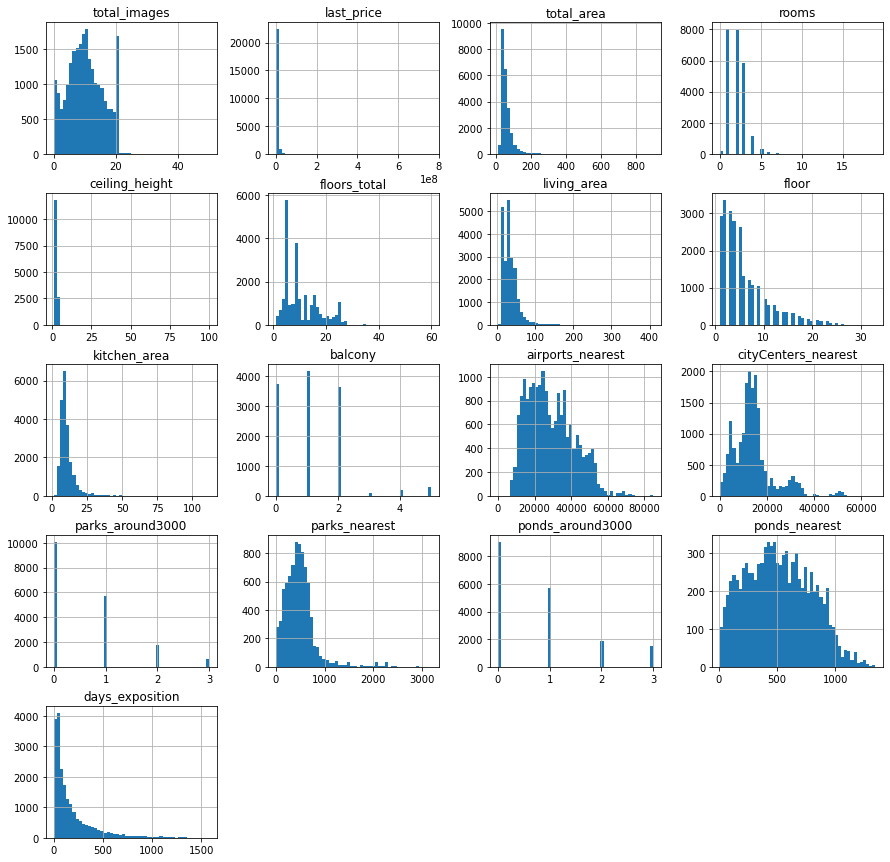

In [4]:
data.hist(bins = 50, figsize = (15, 15))

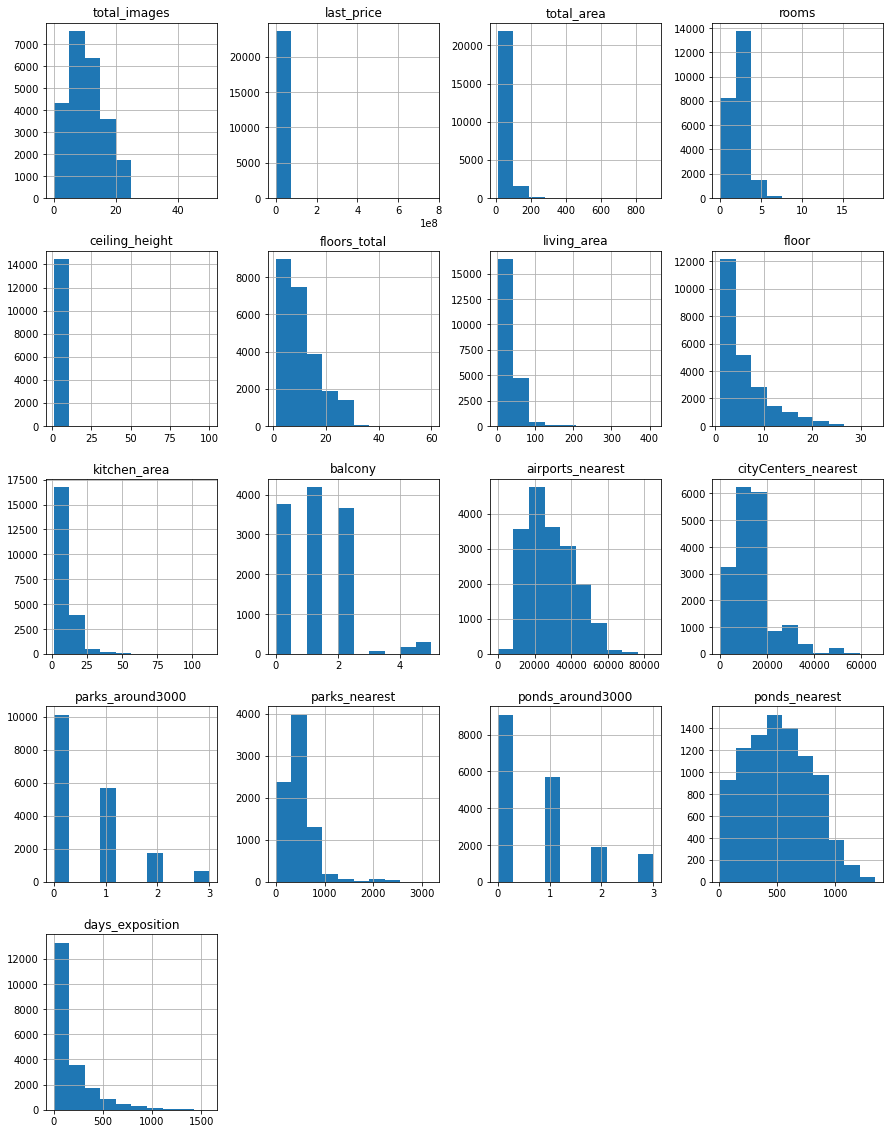

In [5]:
# Код ревьюера

data.hist(figsize=(15, 20))
None

**Вывод по первому шагу:**
В данных 23699 строк, многие колонки в датасете содержат пропуски, есть видимые на гистограммах аномалии и выбросы (высота потолков, комнаты, расстояние до аэропорта).

### Предобработка данных

Ниже описан чеклист, описывающий действия, которые были проделаны в рамках предобработки данных, способы работы с теми или иными особенностями датасета и прочие действия, проделанные с датасетом в процессе предобработки данных.

Чеклист предобработки данных для себя.
**Ликвидация пропусков:**
- [x]  ceiling_height (высота потолков (м)) - медиана по населенному пункту, пропуски допустимы;
- [x]  floors_total (всего этажей в доме) - nan -> убрать значения, так как необходим полностью заполненный столбец для анализа;
- [x]  living_area (жилая площадь в квадратных метрах (м²)) - либо медиана по населенному пункту, либо удалить, либо не заполнять;
- [x]  is_apartment (апартаменты) - nan -> False;
- [x]  kitchen_area (площадь кухни в квадратных метрах (м²)) - nan -> если студия, то 0, если не студия то либо разность общей с жилой, **либо не заполнять**;
- [x]  balcony (число балконов) - nan -> 0;
- [x]  locality_name (название населённого пункта) - nan -> удаление;
- [x]  airports_nearest (расстояние до ближайшего аэропорта в метрах (м)) - nan - медиана по населенному пункту;
- [x]  cityCenters_nearest (расстояние до центра города (м) - nan - медиана по населенному пункту;
- [x]  parks_around3000 (число парков в радиусе 3 км) - nan - 0;
- [x]  parks_nearest (расстояние до ближайшего парка (м)) - nan -> пропуск допустим, если в радиусе 3км 0 парков;
- [x]  ponds_around3000 (число парков в радиусе 3 км) - nan - 0;
- [x]  ponds_nearest (расстояние до ближайшего парка (м))  - nan -> пропуск допустим, если в радиусе 3км 0 прудов;
- [x]  days_exposition (сколько дней было размещено объявление (от публикации до снятия)) - nan - не проданное объявление (пропуск допустим).

**Дополнительные действия по предобработке данных.**
- [x]  удаление неявных дубликатов в locality_name (13 населенных пунктов со сходным названием и 36 неявных дубликатов, хороший пример "поселок Лесное", "посёлок Лесное" и "коттеджный поселок Лесное");
- [x]  перевод даты и времени в datetime;
- [x]  удаление строк датасета с неверными данными по жилой/общей площади. По БТИ площадь кухни не бывает менее 5 метров, но сделано допущение, что у студии может быть площадь кухни 0;
- [x]  работа с данными по высоте потолка, по СП 54.13330.2016 "СНиП 31-01-2003 Здания жилые многоквартирные" минимальная высота потолка ограничена значением 2.5 м (для жилых помещений). Для данного параметра по СНИПам можно выяснить много тонкостей, но в рамках задачи принято решение принять значения менее 2.5 метров ошибочными, также ошибочными признаны данные с высотой потолка в диапазоне не включительно от 10.3 метра и до 25 метров. Высоты потолков от 25 метров включительно подлежат делению на 10; 
- [x]  удалить квартиры с 0 комнат;
- [x]  удалить квартиры с 0м до аэропорта.

In [6]:
#Обработка пропусков по прудам и паркам

data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

#проверка на то, что пропуск в расстоянии до ближайшего парка/пруда только у тех квартир, где в количестве 
#парков/прудов в радиусе 3км стоит 0
print(data.loc[(data['parks_around3000'] != 0) & (data['parks_nearest'].isna() == True)].shape[0])
print(data.loc[(data['ponds_around3000'] != 0) & (data['ponds_nearest'].isna() == True)].shape[0])

data.info()

0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_neares

In [7]:
#пропуски по названию населенного пункта и обработка данных столбца

def locality_name_modder(df):
    df = df.replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
    df = df.replace('городской посёлок Лесогорский', 'поселок городского типа Лесогорский')
    df = df.replace('городской посёлок Мга', 'посёлок городского типа Мга')
    df = df.replace('городской посёлок Назия', 'поселок городского типа Назия')
    df = df.replace('Рябово', 'поселок городского типа Рябово')
    df = df.replace('городской посёлок Советский', 'поселок городского типа Советский')
    df = df.replace('городской посёлок Янино-1', 'городской поселок Янино-1')
    df = df.replace('деревня Кудрово', 'Кудрово')
    df = df.replace('деревня Фёдоровское', 'городской поселок Фёдоровское')
    df = df.replace('коттеджный посёлок Лесное', 'коттеджный поселок Лесное')
    df = df.replace('посёлок Аннино', 'поселок Аннино')
    df = df.replace('посёлок Бугры', 'поселок Бугры')
    df = df.replace('посёлок Возрождение', 'поселок Возрождение')
    df = df.replace('посёлок Гаврилово', 'поселок Гаврилово')
    df = df.replace('поселок Гарболово', 'деревня Гарболово')
    df = df.replace('посёлок городского типа Вырица', 'поселок городского типа Вырица')
    df = df.replace('посёлок городского типа имени Свердлова', 'поселок городского типа имени Свердлова')
    df = df.replace('посёлок городского типа Красный Бор', 'поселок городского типа Красный Бор')
    df = df.replace('посёлок городского типа Кузьмоловский', 'поселок городского типа Кузьмоловский')
    df = df.replace('посёлок городского типа Лебяжье', 'поселок городского типа Лебяжье')
    df = df.replace('посёлок городского типа Рощино', 'поселок городского типа Рощино')
    df = df.replace('посёлок городского типа Рябово', 'поселок городского типа Рябово')
    df = df.replace('посёлок городского типа Токсово', 'поселок городского типа Токсово')
    df = df.replace('посёлок городского типа Форносово', 'поселок городского типа Форносово')
    df = df.replace('посёлок Жилгородок', 'поселок Жилгородок')
    df = df.replace('посёлок Ильичёво', 'поселок Ильичёво')
    df = df.replace('посёлок Кобралово', 'поселок Кобралово')
    df = df.replace('посёлок Коробицыно', 'поселок Коробицыно')
    df = df.replace('посёлок Лисий Нос', 'поселок Лисий Нос')
    df = df.replace('посёлок Мельниково', 'поселок Мельниково')
    df = df.replace('посёлок Мурино', 'поселок Мурино')
    df = df.replace('посёлок Новый Свет', 'поселок Новый Свет')
    df = df.replace('посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор')
    df = df.replace('посёлок Перово', 'поселок Перово')
    df = df.replace('посёлок Победа', 'поселок Победа')
    df = df.replace('посёлок Поляны', 'поселок Поляны')
    df = df.replace('посёлок Старая Малукса', 'поселок Старая Малукса')
    df = df.replace('посёлок Стеклянный', 'поселок Стеклянный')
    df = df.replace('посёлок Сумино', 'поселок Сумино')
    df = df.replace('посёлок Тельмана', 'поселок Тельмана')
    df = df.replace('посёлок Терволово', 'поселок Терволово')
    df = df.replace('посёлок Усть-Луга', 'поселок Усть-Луга')
    
    return df

print('Кол-во квартир с не указанным населенным пунктом:', 
      data.loc[data['locality_name'].isna() == True].shape[0], '\n')
data = data.dropna(subset = ['locality_name'])
print('Кол-во квартир с не указанным населенным пунктом после удаления строк датафрейма:', 
      data.loc[data['locality_name'].isna() == True].shape[0], '\n')

print('Кол-во уникальных названий населенных пунктов до удаления неявных дубликатов:', 
      data['locality_name'].nunique(), '\n')
data = locality_name_modder(data)
print('Кол-во уникальных названий населенных пунктов после удаления неявных дубликатов:', 
      data['locality_name'].nunique(), '\n')
data.info()

Кол-во квартир с не указанным населенным пунктом: 49 

Кол-во квартир с не указанным населенным пунктом после удаления строк датафрейма: 0 

Кол-во уникальных названий населенных пунктов до удаления неявных дубликатов: 364 

Кол-во уникальных названий населенных пунктов после удаления неявных дубликатов: 325 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment 

In [8]:
#балконы и апартаменты

data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
#удаление строк датасета не проходящих проверку по площадям (общая площадь <= площадь кухни + жилая площадь)

data = data.loc[~(data['kitchen_area'] + data['living_area'] > data['total_area'])]
data['living_area'] = data['living_area'].fillna(data['total_area'] - data['kitchen_area'])
data = data.loc[data['living_area'].isna() == False]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22126 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22126 non-null  int64  
 1   last_price            22126 non-null  float64
 2   total_area            22126 non-null  float64
 3   first_day_exposition  22126 non-null  object 
 4   rooms                 22126 non-null  int64  
 5   ceiling_height        13879 non-null  float64
 6   floors_total          22074 non-null  float64
 7   living_area           22126 non-null  float64
 8   floor                 22126 non-null  int64  
 9   is_apartment          22126 non-null  bool   
 10  studio                22126 non-null  bool   
 11  open_plan             22126 non-null  bool   
 12  kitchen_area          21317 non-null  float64
 13  balcony               22126 non-null  float64
 14  locality_name         22126 non-null  object 
 15  airports_nearest   

In [10]:
#площадь кухни для студий

#у всех студий были пропуски по площади кухни, пропуски были заполнены 0
data.loc[(data['kitchen_area'].isna() == True) & (data['studio'] == True)] =\
data.loc[(data['kitchen_area'].isna() == True) & (data['studio'] == True)].fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22126 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22126 non-null  int64  
 1   last_price            22126 non-null  float64
 2   total_area            22126 non-null  float64
 3   first_day_exposition  22126 non-null  object 
 4   rooms                 22126 non-null  int64  
 5   ceiling_height        13944 non-null  float64
 6   floors_total          22074 non-null  float64
 7   living_area           22126 non-null  float64
 8   floor                 22126 non-null  int64  
 9   is_apartment          22126 non-null  bool   
 10  studio                22126 non-null  bool   
 11  open_plan             22126 non-null  bool   
 12  kitchen_area          21456 non-null  float64
 13  balcony               22126 non-null  float64
 14  locality_name         22126 non-null  object 
 15  airports_nearest   

In [11]:
# пропуски по количеству этажей в доме 
data = data.loc[data['floors_total'].isna() == False]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22074 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22074 non-null  int64  
 1   last_price            22074 non-null  float64
 2   total_area            22074 non-null  float64
 3   first_day_exposition  22074 non-null  object 
 4   rooms                 22074 non-null  int64  
 5   ceiling_height        13938 non-null  float64
 6   floors_total          22074 non-null  float64
 7   living_area           22074 non-null  float64
 8   floor                 22074 non-null  int64  
 9   is_apartment          22074 non-null  bool   
 10  studio                22074 non-null  bool   
 11  open_plan             22074 non-null  bool   
 12  kitchen_area          21418 non-null  float64
 13  balcony               22074 non-null  float64
 14  locality_name         22074 non-null  object 
 15  airports_nearest   

In [12]:
# изменение типов данных

#изменение типа данных для столбца с датой размещения
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format = '%Y-%m-%dT%H:%M:%S')

#изменение типа данных для столбца с этажами
data['floors_total'] = data['floors_total'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22074 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22074 non-null  int64         
 1   last_price            22074 non-null  float64       
 2   total_area            22074 non-null  float64       
 3   first_day_exposition  22074 non-null  datetime64[ns]
 4   rooms                 22074 non-null  int64         
 5   ceiling_height        13938 non-null  float64       
 6   floors_total          22074 non-null  int64         
 7   living_area           22074 non-null  float64       
 8   floor                 22074 non-null  int64         
 9   is_apartment          22074 non-null  bool          
 10  studio                22074 non-null  bool          
 11  open_plan             22074 non-null  bool          
 12  kitchen_area          21418 non-null  float64       
 13  balcony         

In [13]:
#обработка данных по высоте потолка
#удаление некорректных значений

delete_percent = data[((data['ceiling_height'] < 2.5)\
                       | ((data['ceiling_height'] > 10.3)\
                          & (data['ceiling_height'] < 25)))].shape[0]/data.shape[0]
print('Процент значений с высотой потолка менее 2.5 и от 10.3 до 25:', delete_percent, '\n')

#удаление квартир с ошибочной высотой потолка
data = data[~((data['ceiling_height'] < 2.5)\
              | ((data['ceiling_height'] > 10.3)\
                 & (data['ceiling_height'] < 25)))].sort_values('ceiling_height', ascending = False)

#деление на 10 значений в диапазоне высот более 25 метров
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x >= 25 else x)

#заполнение пропусков высот потолков медианами по населенному пункту где это возможно
data['ceiling_height'] =\
data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))

data.info()

Процент значений с высотой потолка менее 2.5 и от 10.3 до 25: 0.006206396665760623 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21937 entries, 22869 to 23696
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21937 non-null  int64         
 1   last_price            21937 non-null  float64       
 2   total_area            21937 non-null  float64       
 3   first_day_exposition  21937 non-null  datetime64[ns]
 4   rooms                 21937 non-null  int64         
 5   ceiling_height        21847 non-null  float64       
 6   floors_total          21937 non-null  int64         
 7   living_area           21937 non-null  float64       
 8   floor                 21937 non-null  int64         
 9   is_apartment          21937 non-null  bool          
 10  studio                21937 non-null  bool          
 11  open_plan             21937 non-null  bool 

In [14]:
#аэропорты и центр города

for locality_name in data['locality_name'].unique():
    data.loc[data['locality_name'] == locality_name, 'airports_nearest'] =\
    data.loc[data['locality_name'] == locality_name, 'airports_nearest']\
    .fillna(data.loc[data['locality_name'] == locality_name, 'airports_nearest'].median())
    

for locality_name in data['locality_name'].unique():
    data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'] =\
    data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest']\
    .fillna(data.loc[data['cityCenters_nearest'] == locality_name, 'cityCenters_nearest'].median())
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21937 entries, 22869 to 23696
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21937 non-null  int64         
 1   last_price            21937 non-null  float64       
 2   total_area            21937 non-null  float64       
 3   first_day_exposition  21937 non-null  datetime64[ns]
 4   rooms                 21937 non-null  int64         
 5   ceiling_height        21847 non-null  float64       
 6   floors_total          21937 non-null  int64         
 7   living_area           21937 non-null  float64       
 8   floor                 21937 non-null  int64         
 9   is_apartment          21937 non-null  bool          
 10  studio                21937 non-null  bool          
 11  open_plan             21937 non-null  bool          
 12  kitchen_area          21283 non-null  float64       
 13  balcony     

In [15]:
# Код ревьюера

# Так можно преобразовать твои построения ниже
for locality_name in data['locality_name'].unique():
    data.loc[data['locality_name'] == locality_name, 'airports_nearest'] = \
        data.loc[data['locality_name'] == locality_name, 'airports_nearest']\
        .fillna(data.loc[data['locality_name'] == locality_name, 'airports_nearest'].median()) 

# Большие вычисления всегда можно взять в скобки
a = (1
    + 2
    + (3 - 4)
    - 5
    - 6)

print(a)

-9


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21813 entries, 22869 to 23696
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20036 non-null  float64       
 1   last_price            20036 non-null  float64       
 2   total_area            20036 non-null  float64       
 3   first_day_exposition  20036 non-null  datetime64[ns]
 4   rooms                 20036 non-null  float64       
 5   ceiling_height        19947 non-null  float64       
 6   floors_total          20036 non-null  float64       
 7   living_area           20036 non-null  float64       
 8   floor                 20036 non-null  float64       
 9   is_apartment          20036 non-null  object        
 10  studio                20036 non-null  object        
 11  open_plan             20036 non-null  object        
 12  kitchen_area          19531 non-null  float64       
 13  balcony     

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21808,6.0,3200000.0,39.0,2017-12-16,1.0,2.7,9.0,20.0,6.0,False,False,False,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
21809,3.0,5500000.0,52.0,2018-07-19,2.0,2.7,5.0,31.0,2.0,False,False,False,6.0,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
21810,2.0,1350000.0,30.0,2017-07-07,1.0,2.6,5.0,17.5,4.0,False,False,False,6.0,0.0,Тихвин,NaN,NaN,0.0,NaN,0.0,NaN,413.0
21811,14.0,3100000.0,59.0,2018-01-15,3.0,2.5,5.0,38.0,4.0,False,False,False,8.5,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
21812,18.0,2500000.0,56.7,2018-02-11,2.0,NaN,3.0,29.7,1.0,False,False,False,NaN,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


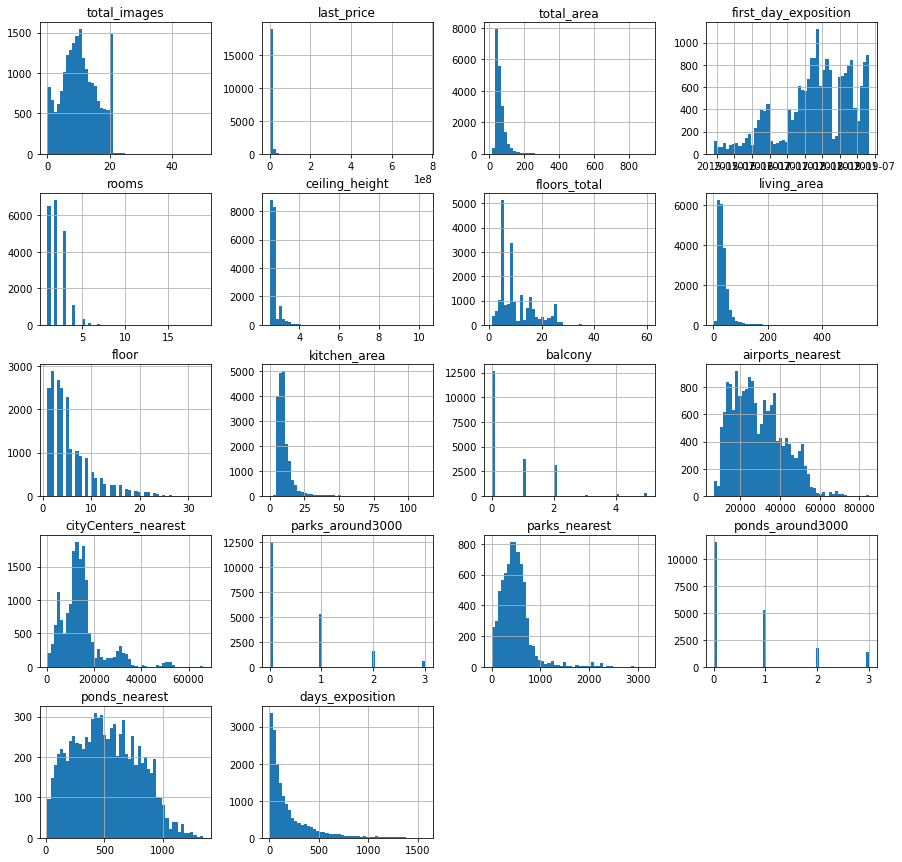

In [16]:
#прочие действия по предобработке

data = data.loc[~(data['rooms'] == 0)]
data.loc[data['airports_nearest'] == 0] = np.nan

data.info()
data.hist(bins = 50, figsize = (15, 15))

#сброс и проверка индексации после всех действий с датафреймом
data = data.reset_index(drop = True)
display(data.tail())

### Вывод по предобработке данных.
В датасете сохранены 84.54% исходной информации. Изменены типы данных для столбца "first_day_exposition" и "floors_total". Удалены неявные дубликаты "locality_name" с учетом контекста и проверкой по яндекс картам. Убраны некорректные значения из датасета, которые не прошли проверку по площадям (общая > жилая + кухня) и с непонятными аномалиями по высоте потолка. Заполнены пропуски там где это было возможно. В некоторых колонках остались пропуски, считаю их не критичными и допустимыми:
* ceiling_height - не представляется возможным заполнить, пропусков в исходном датасете много, часть была заполнена медианой по населенному пункту. Есть аномальные населенные пункты.
* kitchen_area - пропусков сравнительно немного, по возможности они были убраны на этапе предобработке, не сильно влияют на дальнейший анализ;
* пропуски в расстоянии до центра города и аэропорта можно объяснить большим расстоянием до них;
* пропуски в парках и прудах можно объяснить их отсутствием.

### Посчитайте и добавьте в таблицу новые столбцы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21813 entries, 0 to 21812
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20036 non-null  float64       
 1   last_price            20036 non-null  float64       
 2   total_area            20036 non-null  float64       
 3   first_day_exposition  20036 non-null  datetime64[ns]
 4   rooms                 20036 non-null  float64       
 5   ceiling_height        19947 non-null  float64       
 6   floors_total          20036 non-null  float64       
 7   living_area           20036 non-null  float64       
 8   floor                 20036 non-null  float64       
 9   is_apartment          20036 non-null  object        
 10  studio                20036 non-null  object        
 11  open_plan             20036 non-null  object        
 12  kitchen_area          19531 non-null  float64       
 13  balcony         

<AxesSubplot:>

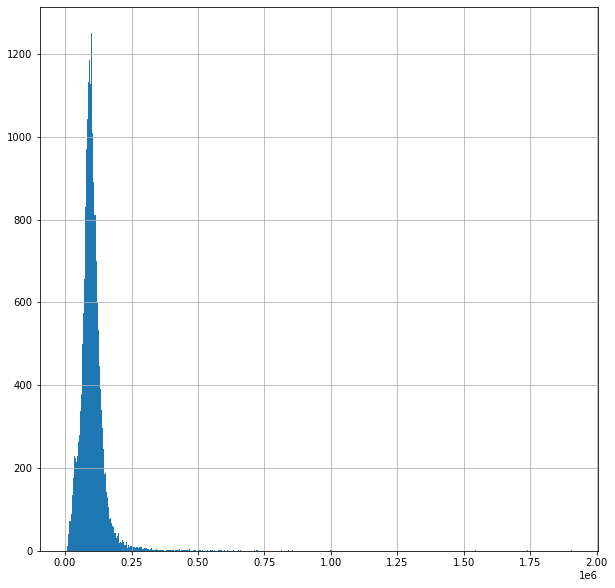

In [17]:
#добавление цены квадратного метра
data['square_meter_price'] = data['last_price'] / data['total_area']

data.info()

data['square_meter_price'].hist(bins = 500, figsize = (10, 10))


In [18]:
#добавление дня, месяца и года публикации объявления
data['first_day_exposition_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['first_day_exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['first_day_exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

display(data.head())

data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year
0,0.0,15000000.0,25.0,2018-07-25,1.0,10.0,5.0,14.0,5.0,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,600000.000000,2.0,7.0,2018.0
1,19.0,9999000.0,92.4,2019-04-05,2.0,3.2,6.0,55.5,5.0,False,False,False,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN,108214.285714,4.0,4.0,2019.0
2,14.0,2900000.0,75.0,2018-11-12,3.0,3.2,3.0,53.0,2.0,False,False,False,8.0,0.0,Волхов,NaN,NaN,0.0,NaN,0.0,NaN,NaN,38666.666667,0.0,11.0,2018.0
3,1.0,3900000.0,56.0,2017-12-22,3.0,2.7,5.0,33.0,4.0,False,False,False,NaN,0.0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0,69642.857143,4.0,12.0,2017.0
4,17.0,8150000.0,80.0,2019-01-09,2.0,2.7,36.0,41.0,13.0,False,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,101875.000000,2.0,1.0,2019.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21813 entries, 0 to 21812
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                20036 non-null  float64       
 1   last_price                  20036 non-null  float64       
 2   total_area                  20036 non-null  float64       
 3   first_day_exposition        20036 non-null  datetime64[ns]
 4   rooms                       20036 non-null  float64       
 5   ceiling_height              19947 non-null  float64       
 6   floors_total                20036 non-null  float64       
 7   living_area                 20036 non-null  float64       
 8   floor                       20036 non-null  float64       
 9   is_apartment                20036 non-null  object        
 10  studio                      20036 non-null  object        
 11  open_plan                   20036 non-null  object    

In [19]:
#добавление типа этажа квартиры
def floor_analisator(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_analisator, axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21813 entries, 0 to 21812
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                20036 non-null  float64       
 1   last_price                  20036 non-null  float64       
 2   total_area                  20036 non-null  float64       
 3   first_day_exposition        20036 non-null  datetime64[ns]
 4   rooms                       20036 non-null  float64       
 5   ceiling_height              19947 non-null  float64       
 6   floors_total                20036 non-null  float64       
 7   living_area                 20036 non-null  float64       
 8   floor                       20036 non-null  float64       
 9   is_apartment                20036 non-null  object        
 10  studio                      20036 non-null  object        
 11  open_plan                   20036 non-null  object    

In [20]:
#добавление расстояния до центра в км
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_type,cityCenters_nearest_km
0,0.0,15000000.0,25.0,2018-07-25,1.0,10.0,5.0,14.0,5.0,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,600000.000000,2.0,7.0,2018.0,последний,8.0
1,19.0,9999000.0,92.4,2019-04-05,2.0,3.2,6.0,55.5,5.0,False,False,False,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN,108214.285714,4.0,4.0,2019.0,другой,4.0
2,14.0,2900000.0,75.0,2018-11-12,3.0,3.2,3.0,53.0,2.0,False,False,False,8.0,0.0,Волхов,NaN,NaN,0.0,NaN,0.0,NaN,NaN,38666.666667,0.0,11.0,2018.0,другой,NaN
3,1.0,3900000.0,56.0,2017-12-22,3.0,2.7,5.0,33.0,4.0,False,False,False,NaN,0.0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0,69642.857143,4.0,12.0,2017.0,другой,16.0
4,17.0,8150000.0,80.0,2019-01-09,2.0,2.7,36.0,41.0,13.0,False,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,101875.000000,2.0,1.0,2019.0,другой,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21813 entries, 0 to 21812
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                20036 non-null  float64       
 1   last_price                  20036 non-null  float64       
 2   total_area                  20036 non-null  float64       
 3   first_day_exposition        20036 non-null  datetime64[ns]
 4   rooms                       20036 non-null  float64       
 5   ceiling_height              19947 non-null  float64       
 6   floors_total                20036 non-null  float64       
 7   living_area                 20036 non-null  float64       
 8   floor                       20036 non-null  float64       
 9   is_apartment                20036 non-null  object        
 10  studio                      20036 non-null  object        
 11  open_plan                   20036 non-null  object    

**Вывод по данному шагу:**
В таблицу были добавлены столбцы со следующей информацией:
* цена одного квадратного метра;
* день недели публикации объявления;
* месяц публикации объявления;
* год публикации объявления;
* расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

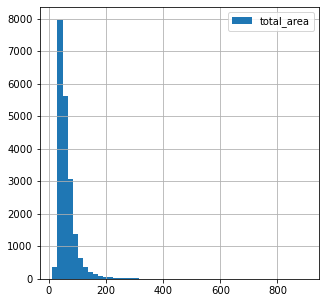

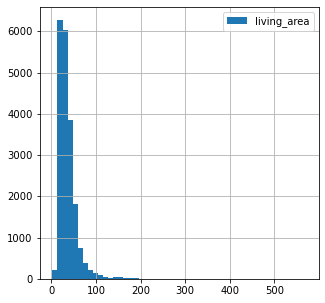

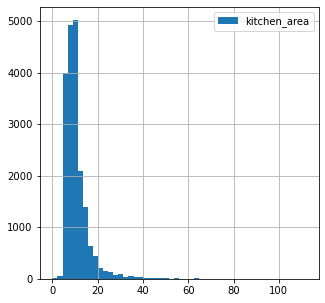

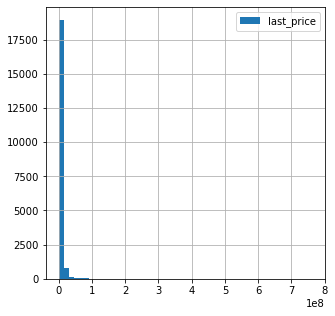

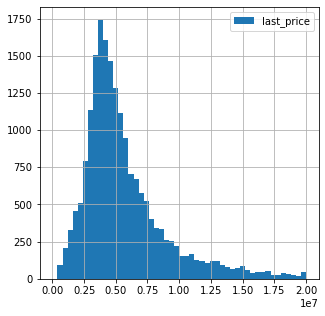

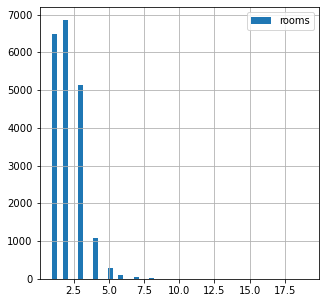

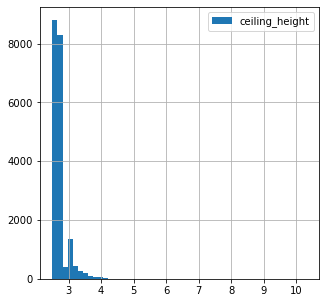

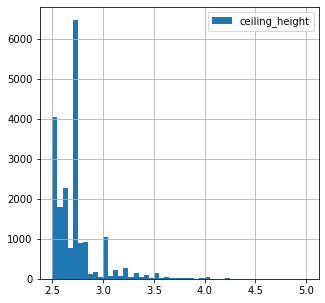

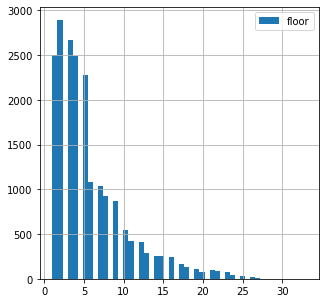

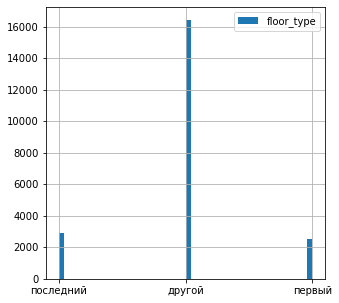

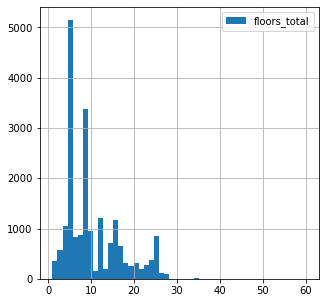

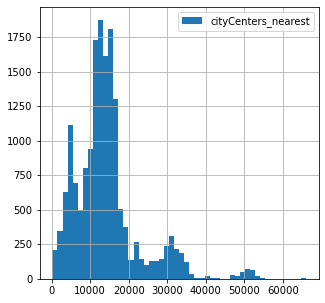

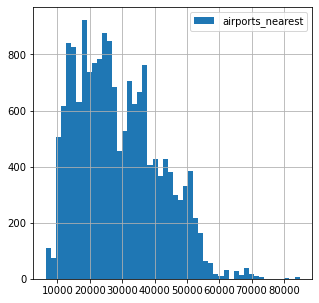

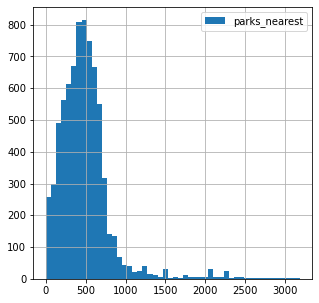

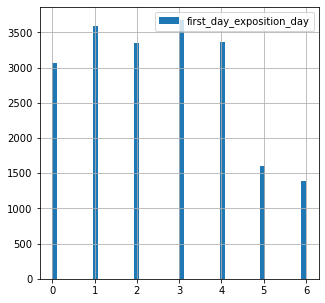

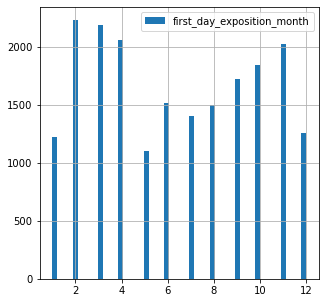

In [21]:
#гистограммы

data['total_area'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['living_area'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['kitchen_area'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['last_price'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['last_price'].hist(bins = 50, figsize = (5,5), legend = True, range = (0, 20000000))
plt.show()


data['rooms'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['ceiling_height'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['ceiling_height'].hist(bins = 50, figsize = (5,5), legend = True, range = (2.5, 5))
plt.show()

data['floor'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['floor_type'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['floors_total'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['cityCenters_nearest'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['airports_nearest'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['parks_nearest'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['first_day_exposition_day'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()

data['first_day_exposition_month'].hist(bins = 50, figsize = (5,5), legend = True)
plt.show()



**Описание гистрограмм:** 
* Гистограмма общей, жилой площади и площади кухни напоминает несколько сдвинутое нормальное распределение, выбивающихся значений нет, есть отчетливый пик;
* Гистограмма последней цены также имеет отчетливый пик около 4-5 млн рублей, построена дважды с разными настройками диапазона значений, так как в датасете были и крайне большие значения цены;
* Гистограмма количества комнат также напоминает нормальное распределение, есть пик на 2 комнатах;
* Гистограмма высоты потолков имеет явные несколько пиков, полагаю, связано это с трендами строительства и рекомендованными значениями высоты потолков;
* Гистограмма этажа квартиры напоминает нормальное распределение, есть отчетливый пик, но также есть "бреши", значения, мало/никак не представленные в датасете;
* Гистограмма типа этажа показывает явный пик группы этажей "другой", что вполне закономерно, так как в любом доме выше 4 этажей этажей типа "другой" будет больше чем первых и последних;
* Общая этажность домов не похожа на нормальное распределение, есть явные несколько пиков, связываю я это с определенными трендами строительства (например, 5 этажек крайне много, а 4 этажные дома встречаются редко, 9 этажек очень много, 8 этажки встречаются редко и тд, по уму, чтобы объяснить данную гистограмму надо изучить поверхностно урбанистику, снипы и сп, бэкграунд утилитарной архитектуры 20го века);
* гистограмма расстояния до центра имеет явные несколько пиков, полагаю, это связано с наличием на определенных расстояниях до центра более густонаселенных пунктов;
* гистограмма расстояния до аэропорта имеет несколько резких пиков, но общий низходящий тренд, полагаю связано это также с тем, что на некоторых расстояниях до аэропорта находятся более густонаселенные районы;
* гистограмма парков по-близости похожа на нормальное распределение с пиком около 500м;
* гистограммы дня и месяца публикации показывают явную сезонность на рынке, весной и осенью (ближе к поздней осени) публикуют наибольшее кол-во объявлений.


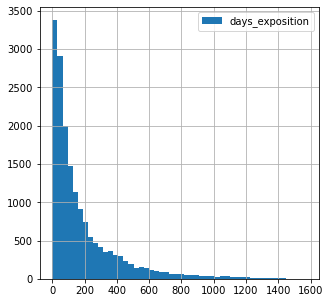

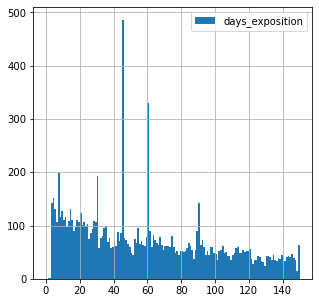

Среднее значение дней продажи: 186.29654170299332 

Медианное значение дней продажи: 102.0 



count    17205.000000
mean       186.296542
std        222.986430
min          1.000000
25%         45.000000
50%        102.000000
75%        241.000000
max       1572.000000
Name: days_exposition, dtype: float64

In [22]:
data['days_exposition'].hist(bins = 50, figsize = (5, 5), legend = True)
plt.show()
data['days_exposition'].hist(bins = 150, figsize = (5, 5), range = (0, 150), legend = True)
plt.show()

print('Среднее значение дней продажи:', data['days_exposition'].mean(), '\n')
print('Медианное значение дней продажи:', data['days_exposition'].median(), '\n')

data['days_exposition'].describe()


**Описание данных о времени продажи квартир.**

Среднее время продажи квартир - 186 дней.
Медианное время продажи квартир - 102 дня.

Существенное отличие среднего от медианы объясняется тем, что довольно большое количество квартир продается долго, максимальное значение времени продажи - 1572 дня.

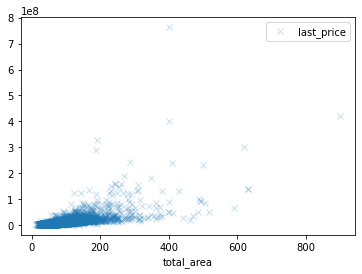

Коэффициент корреляции Пирсона между общей площадью и ценой 0.6496742358337241 



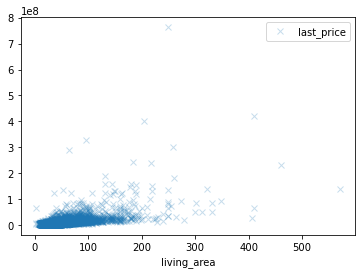

Коэффициент корреляции Пирсона между жилой площадью и ценой 0.5730987289990147 



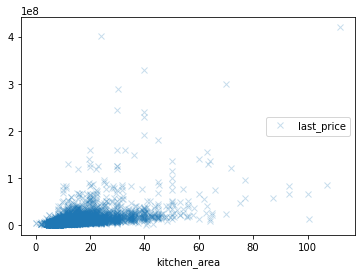

Коэффициент корреляции Пирсона между площадью кухни и ценой 0.5296656649964737 



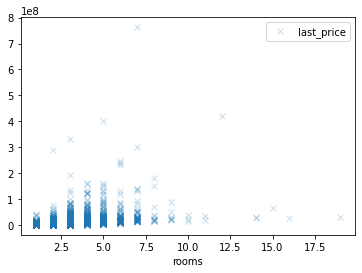

Коэффициент корреляции Пирсона между кол-вом комнат и ценой 0.36216841227026253 



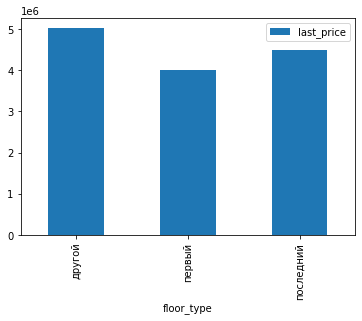

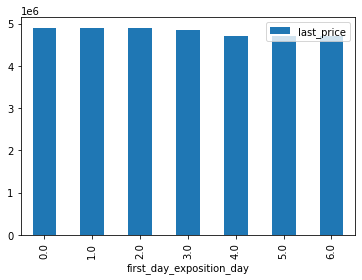

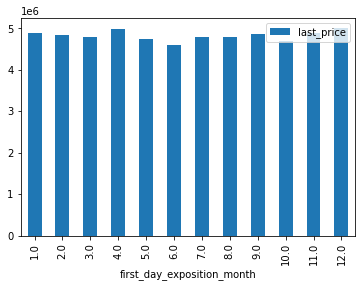

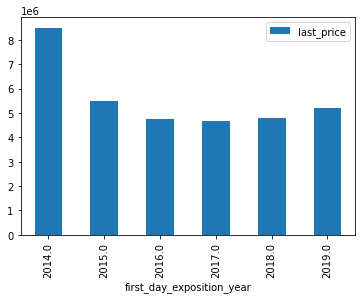

In [23]:
data.plot(x = 'total_area', y = 'last_price', style = 'x', alpha = 0.25)
plt.show()
print('Коэффициент корреляции Пирсона между общей площадью и ценой', data['total_area']\
      .corr(data['last_price']), '\n')

data.plot(x = 'living_area', y = 'last_price', style = 'x', alpha = 0.25)
plt.show()
print('Коэффициент корреляции Пирсона между жилой площадью и ценой', data['living_area']\
      .corr(data['last_price']), '\n')

data.plot(x = 'kitchen_area', y = 'last_price', style = 'x', alpha = 0.25)
plt.show()
print('Коэффициент корреляции Пирсона между площадью кухни и ценой', data['kitchen_area']\
      .corr(data['last_price']), '\n')

data.plot(x = 'rooms', y = 'last_price', style = 'x', alpha = 0.25)
plt.show()
print('Коэффициент корреляции Пирсона между кол-вом комнат и ценой', data['rooms']\
      .corr(data['last_price']), '\n')

floor_type_pivot = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median')
floor_type_pivot.reset_index().plot(x = 'floor_type', y = 'last_price', kind = 'bar')
plt.show()

first_day_exposition_day_pivot =\
data.pivot_table(index = 'first_day_exposition_day', values = 'last_price', aggfunc = 'median')
first_day_exposition_day_pivot.reset_index()\
.plot(x = 'first_day_exposition_day', y = 'last_price', kind = 'bar')
plt.show()

first_day_exposition_month_pivot =\
data.pivot_table(index = 'first_day_exposition_month', values = 'last_price', aggfunc = 'median')
first_day_exposition_month_pivot\
.reset_index().plot(x = 'first_day_exposition_month', y = 'last_price', kind = 'bar')
plt.show()

first_day_exposition_year_pivot =\
data.pivot_table(index = 'first_day_exposition_year', values = 'last_price', aggfunc = 'median')
first_day_exposition_year_pivot.reset_index()\
.plot(x = 'first_day_exposition_year', y = 'last_price', kind = 'bar')
plt.show()


**Факторы, влияющие на полную стоимость объекта:**
* Жилая, полная и площадь кухни существенно влияют на конечную стоимость, коэффициент корреляции Пирсона для этих параметров не ниже 0.53;
* Корреляция между количеством комнат и ценой есть, но существенно менее выражена, чем корреляция цены и площади;
* Квартиры на первом и последнем этаже стоят несколько дешевле, чем на "других";
* Стоимость квартиры не зависит от даты размещения, но в 2015 году произошло резкое падение медианной стоимости недвижимости.

,locality_name,square_meter_price
0,посёлок Репино,127678.571429
1,Зеленогорск,115122.799198
2,Санкт-Петербург,114442.701836
3,деревня Бор,105539.261570
4,Пушкин,103415.576759
5,Сестрорецк,101443.767465
6,поселок Лисий Нос,100660.814239
7,деревня Мистолово,93098.851931
8,посёлок Парголово,90465.483946
9,посёлок Стрельна,88267.456132


'Населенный пункт с самой высокой стоимостью квадратного метра:'

,locality_name,square_meter_price
0,посёлок Репино,127678.571429


'Населенный пункт с самой низкой стоимостью квадратного метра:'

,locality_name,square_meter_price
297,деревня Старополье,10368.663594


,cityCenters_nearest_km,last_price
0,0.0,3.235100e+07
1,1.0,2.164111e+07
2,2.0,1.820272e+07
3,3.0,1.110682e+07
4,4.0,1.316425e+07
5,5.0,1.438725e+07
6,6.0,1.494457e+07
7,7.0,1.448976e+07
8,8.0,1.013553e+07
9,9.0,7.022913e+06


<AxesSubplot:xlabel='locality_name'>

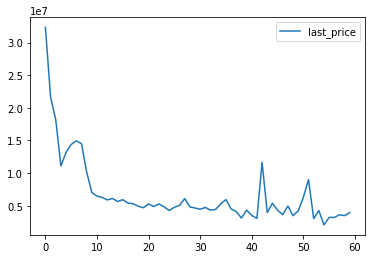

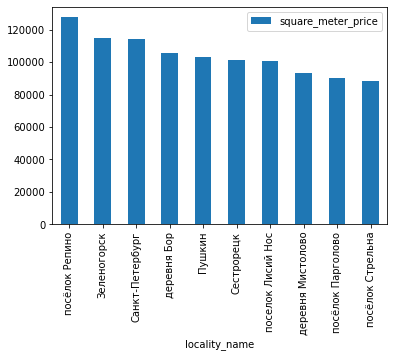

In [24]:
locality_name_meter_price_pivot =\
data.pivot_table(index = 'locality_name', values = 'square_meter_price', aggfunc = 'mean')\
.sort_values('square_meter_price', ascending = False)

locality_name_meter_price_pivot = locality_name_meter_price_pivot.reset_index()
display(locality_name_meter_price_pivot.head(10))

display('Населенный пункт с самой высокой стоимостью квадратного метра:', 
        locality_name_meter_price_pivot.head(1))
display('Населенный пункт с самой низкой стоимостью квадратного метра:', 
        locality_name_meter_price_pivot.tail(1))

city_centers_near_km_price_pivot = \
data.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
city_centers_near_km_price_pivot = city_centers_near_km_price_pivot.reset_index()
display(city_centers_near_km_price_pivot)

city_centers_near_km_price_pivot.plot(y = 'last_price')

locality_name_meter_price_pivot.head(10).plot(kind = 'bar', x = 'locality_name', y = 'square_meter_price')




**Анализ стоимости метра квадратного по населенным пунктам:**
* Самая высокая стоимость квадратного метра в поселке Репино - 127678.571429 р/м2;
* Самая низкая стоимость квадратного метра в деревне Старополье - 10368.663594 р/м2;
* Замыкает первую десятку населенных пунктов с самым дорогим квадратным метром поселок Стрельна - 88267.456132 р/м2.

**Анализ изменения стоимости объекта в зависимости от расстояния до центра города:**
В целом зависимость стоимости от расстояния имеет убывающий характер, но имеет несколько явных локальных пиков. Полагаю, объяснить их можно тем, что за городом могут быть относительно элитные поселки с высокой стоимостью жилья.

**Вывод по данному шагу:**
* гистограммы исследуемых параметров квартир выглядят преимущественно похожими на нормальное распределение, выбросов и аномалий нет;
* среднее время продажи квартиры - 186 дней;
* медианное время продажи квартиры - 102 дня;
* наблюдается корреляция площади квартиры и цены (чем больше квартира, тем дороже);
* на рынке недвижимости выражена сезонность - весной и осенью выкладывают больше объявления;
* самый дорогой квадратный метр в поселке Репино - 127678 рублей за квадратный метр;
* самый недорогой квадратный метр в деревне Старополье - 10368 р за квадратный метр;
* замыкает десятку наиболее дорогих населенных пунктов по стоимости квадратного метра поселок Стрельна - 88267 рублей за метр квадратный;
* наблюдается уменьшение средней цены квадратного метра с удалением от центра города, пики объясняются наличием в дорогих пригородов/загородных поселений. 

### Общий вывод

#### Предобработка данных.
В датасете сохранены 84.54% (20036 объявлений из 23699 изначальных) исходной информации. Изменены типы данных для столбца "first_day_exposition" и "floors_total". Удалены неявные дубликаты "locality_name" с учетом контекста и проверкой по яндекс картам. Убраны некорректные значения из датасета, которые не прошли проверку по площадям (общая > жилая + кухня) и с  аномалиями по высоте потолка. По-возможности заполнены пропуски.  
Колонки, в которых остались пропуски:
* ceiling_height - не представляется возможным заполнить, пропусков в исходном датасете много, часть была заполнена медианой по населенному пункту. Есть аномальные населенные пункты.
* kitchen_area - пропусков сравнительно немного, по возможности они были убраны на этапе предобработки, не сильно влияют на дальнейший анализ;
* пропуски в расстоянии до центра города и аэропорта можно объяснить большим расстоянием до них;
* пропуски в парках и прудах можно объяснить их отсутствием.  

Из датасета удалены объявления в которых:
* некорректные (по-моему мнению) значения потолков - 137 объявлений (около 0.578% исходного датасета);
* не указан населенный пункт - 49 объявлений (около 0.206% исходного датасета);
* не прошедшие проверку по площадям (площадь кухни + жилая площадь <= общая площадь, исключая квартиры-студии) - 1524 объявления (около 6.43%);
* не указано кол-во всего этажей в доме (из-за невозмоности выполнения последующего анализа) - 52 объявления (около 0.219%);
* некорректные с 0 комнат (гуглил/яндексил, не бывает квартир с 0 комнат) - 1901 объявление (около 8.021% исходного датасета).

#### Добавление новых данных.
В таблицу были добавлены столбцы со следующей информацией:
* цена одного квадратного метра;
* день недели публикации объявления;
* месяц публикации объявления;
* год публикации объявления;
* расстояние до центра города в километрах.

#### Исследовательский анализ данных.
* гистограммы исследуемых параметров квартир выглядят хорошо, выбросов и аномалий нет;
* среднее время продажи квартиры - 186 дней;
* медианное время продажи квартиры - 102 дня;
* наблюдается корреляция площади квартиры и цены (чем больше квартира, тем дороже);
* корреляция между количеством комнат и ценой есть, но существенно менее выражена, чем корреляция цены и площади;
* квартиры на первом и последнем этаже стоят несколько дешевле, чем на "других";
* стоимость квартиры не зависит от даты размещения, но в 2015 году произошло резкое падение медианной стоимости недвижимости;
* на рынке недвижимости выражена сезонность - весной и осенью выкладывают больше объявления;
* самый дорогой квадратный метр в поселке Репино - 127678 рублей за квадратный метр;
* самый недорогой квадратный метр в деревне Старополье - 10368 р за квадратный метр;
* замыкает десятку наиболее дорогих населенных пунктов по стоимости квадратного метра поселок Стрельна - 88267 рублей за метр квадратный;
* наблюдается уменьшение средней цены квадратного метра с удалением от центра города, пики объясняются наличием в дорогих пригородов/загородных поселеиний. 
